In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

In [ ]:
dataset = pd.read_csv('/content/creditcardataset.csv')

In [ ]:
dataset.shape

(21878, 31)

In [ ]:
dataset.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
pd.value_counts(dataset['Class'])

<ipython-input-12-730eccfa18e4>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(dataset['Class'])


,count
Class,
0.0,21791
1.0,86


<Axes: ylabel='count'>

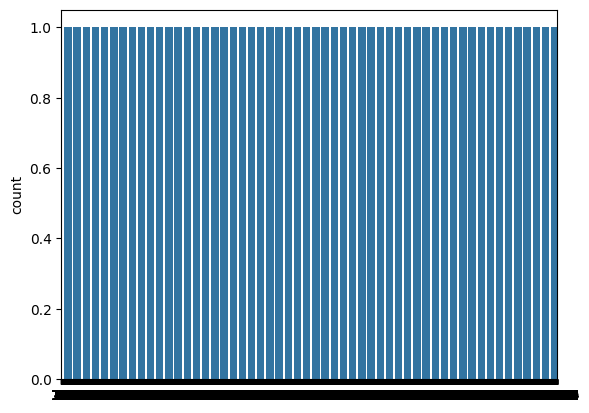

In [ ]:
sns.countplot(dataset['Class'])

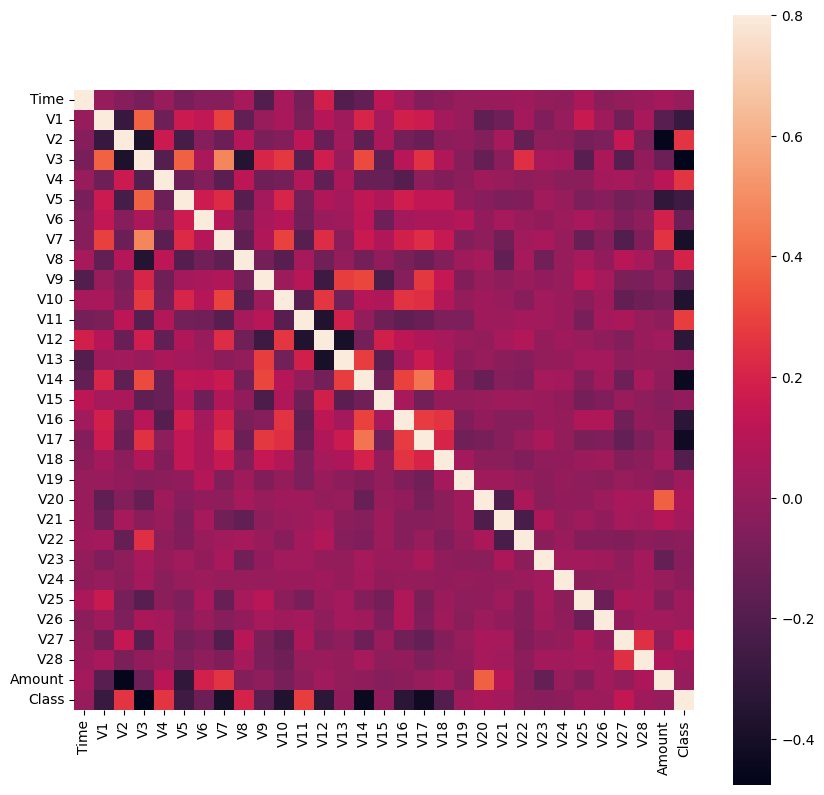

In [ ]:
corrmat = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat , vmax=0.8 , square=True) # Changed 'headmap' to 'heatmap'
plt.show()

In [ ]:
len(dataset[dataset['Class']==0])

21791

In [ ]:
len(dataset[dataset['Class']==1])#fradulent transactions

86

In [ ]:
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [ ]:
# Option 2: Impute NaN values with the most frequent value in 'Class' (if it's categorical)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.reshape(-1, 1))  # Reshape y for the imputer
y = y.ravel()  # Flatten y back to its original shape

# Now apply RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_res, y_res = ros.fit_resample(x, y)


In [ ]:
x_res.shape # Change X to x_res to access the resampled data's shape

(43584, 30)

In [ ]:
from collections import Counter
print(Counter(y))
print(Counter(y_res))

Counter({0.0: 21792, 1.0: 86})
Counter({0.0: 21792, 1.0: 21792})


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , test_size=0.3 , random_state=42)

In [ ]:
x_train.shape

(30508, 30)

In [ ]:
y_train.shape

(30508,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators=641 , random_state=0)
Classifier.fit(x_train , y_train)

RandomForestClassifier(n_estimators=641, random_state=0)

In [ ]:
y_pred = Classifier.predict(x_test)

In [ ]:
n_errors = (y_pred != y_test).sum

In [ ]:
y_test.shape

(13076,)

0.9999235240134597


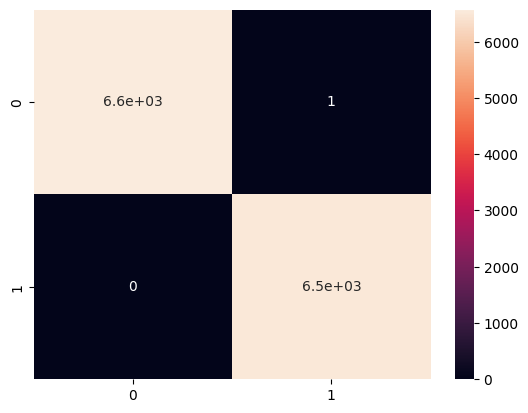

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , y_pred))

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test , y_pred)

0.9998463193483941

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test , y_pred)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test ,  y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6570
         1.0       1.00      1.00      1.00      6506

    accuracy                           1.00     13076
   macro avg       1.00      1.00      1.00     13076
weighted avg       1.00      1.00      1.00     13076

